<a href="https://colab.research.google.com/github/ak-malone/NLU/blob/main/movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# https://www.kaggle.com/datasets/devendra45/movies-similarity
movies = pd.read_csv("gdrive/My Drive/Uni/Diss/movies.csv")

In [ ]:
movies.dropna(inplace=True)

In [ ]:
movies

,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."
...,...,...,...,...,...
94,94,Double Indemnity,"[u' Crime', u' Drama', u' Film-Noir', u' Thril...",\n\n\n\nNeff confesses into a Dictaphone.\n\n ...,Walter Neff (MacMurray) is a successful insura...
95,95,Rebel Without a Cause,[u' Drama'],\n\n\n\nJim Stark is in police custody.\n\n \...,Shortly after moving to Los Angeles with his p...
96,96,Rear Window,"[u' Mystery', u' Thriller']",\n\n\n\nJames Stewart as L.B. Jefferies\n\n \...,"L.B. ""Jeff"" Jeffries (James Stewart) recuperat..."
97,97,The Third Man,"[u' Film-Noir', u' Mystery', u' Thriller']",\n\n\n\nSocial network mapping all major chara...,"Sights of Vienna, Austria, flash across the sc..."


In [ ]:
movies["wiki_plot_words"] = movies.wiki_plot.str.split()
movies["imdb_plot_words"] = movies.imdb_plot.str.split()

In [ ]:
movies

,rank,title,genre,wiki_plot,imdb_plot,wiki_plot_words,imdb_plot_words
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","[On, the, day, of, his, only, daughter's, wedd...","[In, late, summer, 1945,, guests, are, gathere..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","[In, 1947,, banker, Andy, Dufresne, is, convic...","[In, 1947,, Andy, Dufresne, (Tim, Robbins),, a..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"[In, 1939,, the, Germans, move, Polish, Jews, ...","[The, relocation, of, Polish, Jews, from, surr..."
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","[In, a, brief, scene, in, 1964,, an, aging,, o...","[The, film, opens, in, 1964,, where, an, older..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...","[It, is, early, December, 1941., American, exp...","[In, the, early, years, of, World, War, II,, D..."
...,...,...,...,...,...,...,...
94,94,Double Indemnity,"[u' Crime', u' Drama', u' Film-Noir', u' Thril...",\n\n\n\nNeff confesses into a Dictaphone.\n\n ...,Walter Neff (MacMurray) is a successful insura...,"[Neff, confesses, into, a, Dictaphone., Neff, ...","[Walter, Neff, (MacMurray), is, a, successful,..."
95,95,Rebel Without a Cause,[u' Drama'],\n\n\n\nJim Stark is in police custody.\n\n \...,Shortly after moving to Los Angeles with his p...,"[Jim, Stark, is, in, police, custody., Jim, St...","[Shortly, after, moving, to, Los, Angeles, wit..."
96,96,Rear Window,"[u' Mystery', u' Thriller']",\n\n\n\nJames Stewart as L.B. Jefferies\n\n \...,"L.B. ""Jeff"" Jeffries (James Stewart) recuperat...","[James, Stewart, as, L.B., Jefferies, James, S...","[L.B., ""Jeff"", Jeffries, (James, Stewart), rec..."
97,97,The Third Man,"[u' Film-Noir', u' Mystery', u' Thriller']",\n\n\n\nSocial network mapping all major chara...,"Sights of Vienna, Austria, flash across the sc...","[Social, network, mapping, all, major, charact...","[Sights, of, Vienna,, Austria,, flash, across,..."


In [ ]:
def Jaccard(text1, text2):
  intersection = len(set(text1) & set(text2))
  union = len(set(text1) | set(text2))
  return(intersection/union)

In [ ]:
movies["Jaccard_Similarity"] = movies.apply(lambda x: Jaccard(x.wiki_plot_words, x.imdb_plot_words), axis=1)
sim_cols = ["Jaccard_Similarity"]

Stats bit

In [ ]:
def logloss(df,col,sim):
  return -sim*sum(np.log(df[col])/len(df))-(1-sim)*sum(np.log(1-df[col])/len(df))

In [ ]:
log_loss = [[sim_cols[-1], logloss(movies,sim_cols[-1],True)]]
print("Log Loss: ", log_loss[-1])

Log Loss:  ['Jaccard_Similarity', 1.5615563067360148]


<Axes: >

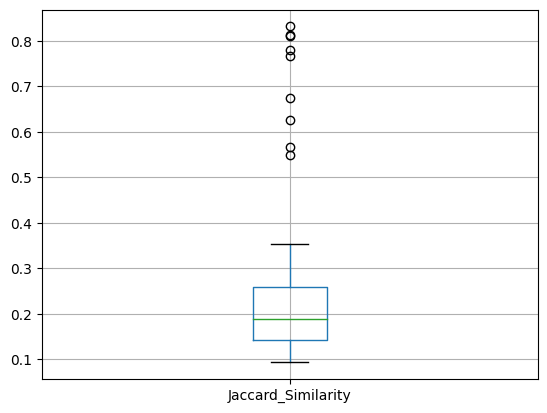

In [ ]:
movies.boxplot(column=sim_cols)

In [ ]:
movies_sorted = movies.sort_values(by="Jaccard_Similarity", ascending=False, ignore_index=True)
#movies_sorted

In [ ]:
print("MOST SIMILAR")
print("")
print(movies_sorted.loc[0]['wiki_plot'])
print(movies_sorted.loc[0]['title'])
print(movies_sorted.loc[0]['imdb_plot'])
print(movies_sorted.loc[0]['Jaccard_Similarity'])

MOST SIMILAR

In 1969, U.S. Army Captain and special operations veteran Benjamin L. Willard (Martin Sheen), returns to Saigon since his involvement in the Vietnam War, drinks heavily and hallucinates alone in his room. One day military intelligence officers Lt. General Corman (G. D. Spradlin) and Colonel Lucas (Harrison Ford) approach him with a top-secret assignment to follow the Nung River into the remote jungle, find rogue Special Forces Colonel Walter E. Kurtz and kill him. Kurtz apparently went insane and now commands his own Montagnard troops inside neutral Cambodia.  In 1969, U.S. Army Captain and   special operations  special operations   veteran   Benjamin L. Willard  Benjamin L. Willard   (  Martin Sheen  Martin Sheen  ), returns to   Saigon  Saigon   since his involvement in the   Vietnam War  Vietnam War  , drinks heavily and hallucinates alone in his room. One day   military intelligence  military intelligence   officers Lt. General Corman (  G. D. Spradlin  G. D. Spradlin

In [ ]:
print("LEAST SIMILAR")
print("")
print(movies_sorted.loc[89]['title'])
print("")
print(movies_sorted.loc[89]['wiki_plot'])
print(movies_sorted.loc[89]['imdb_plot'])
print(movies_sorted.loc[89]['Jaccard_Similarity'])

LEAST SIMILAR

Psycho

Patrick Bateman is a wealthy investment banker living in Manhattan in the late 1980s. His life revolves around dining at trendy restaurants while keeping up appearances for his fiancée, Evelyn, and for his circle of equally wealthy and shallow friends, most of whom he dislikes. However, he also leads a secret life as a serial killer. Throughout the film, Bateman describes the material accoutrements of his lifestyle: his daily morning exercise and beautification routine, his music collection, including performers such as Huey Lewis and the News, Phil Collins, and Whitney Houston, his taste for expensive designer clothes, and the lavish couture of his apartment. In one scene, Bateman and his associates flaunt their business cards in a display of utter vanity. After becoming embarrassed by the superiority of coworker Paul Allen's card, he murders a homeless man and his dog in an alleyway in a fit of frustrated rage. At a Christmas party, Bateman makes plans to have 

#Preprocessing

In [ ]:
def create_bow(documents):
  return list(set([word for movie_description in (documents) for word in movie_description]))

In [ ]:
listofdescriptions = movies.wiki_plot_words.tolist()+movies.imdb_plot_words.tolist()
bagofwords = create_bow(listofdescriptions)
len(bagofwords)

29450

In [ ]:
movies["wiki_plot_lower"] = movies.wiki_plot.str.lower()
movies["imdb_plot_lower"] = movies.imdb_plot.str.lower()

In [ ]:
movies["wiki_plot_lower_words"] = movies.wiki_plot_lower.str.split()
movies["imdb_plot_lower_words"] = movies.imdb_plot_lower.str.split()

In [ ]:

listoflowerdescriptions = movies.wiki_plot_lower_words.tolist()+movies.imdb_plot_lower_words.tolist()
bagoflowerwords = create_bow(listoflowerdescriptions)
len(bagoflowerwords)

28082

In [ ]:
movies["wiki_plot_processed"] = movies["wiki_plot_lower"].str.replace(r'[^\w\s]+', '', regex=True)
movies["imdb_plot_processed"] = movies["imdb_plot_lower"].str.replace(r'[^\w\s]+', '', regex=True)
movies["wiki_plot_processed_words"] = movies.wiki_plot_processed.str.split()
movies["imdb_plot_processed_words"] = movies.imdb_plot_processed.str.split()

In [ ]:
listofppdescriptions = movies.wiki_plot_processed_words.tolist()+movies.imdb_plot_processed_words.tolist()
bagofppwords = create_bow(listofppdescriptions)
len(bagofppwords)

18067

In [ ]:
movies

,rank,title,genre,wiki_plot,imdb_plot,wiki_plot_words,imdb_plot_words,Jaccard_Similarity,wiki_plot_lower,imdb_plot_lower,wiki_plot_lower_words,imdb_plot_lower_words,wiki_plot_processed,imdb_plot_processed,wiki_plot_processed_words,imdb_plot_processed_words
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","[On, the, day, of, his, only, daughter's, wedd...","[In, late, summer, 1945,, guests, are, gathere...",0.164905,"on the day of his only daughter's wedding, vit...","in late summer 1945, guests are gathered for t...","[on, the, day, of, his, only, daughter's, wedd...","[in, late, summer, 1945,, guests, are, gathere...",on the day of his only daughters wedding vito ...,in late summer 1945 guests are gathered for th...,"[on, the, day, of, his, only, daughters, weddi...","[in, late, summer, 1945, guests, are, gathered..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","[In, 1947,, banker, Andy, Dufresne, is, convic...","[In, 1947,, Andy, Dufresne, (Tim, Robbins),, a...",0.158678,"in 1947, banker andy dufresne is convicted of ...","in 1947, andy dufresne (tim robbins), a banker...","[in, 1947,, banker, andy, dufresne, is, convic...","[in, 1947,, andy, dufresne, (tim, robbins),, a...",in 1947 banker andy dufresne is convicted of m...,in 1947 andy dufresne tim robbins a banker in ...,"[in, 1947, banker, andy, dufresne, is, convict...","[in, 1947, andy, dufresne, tim, robbins, a, ba..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"[In, 1939,, the, Germans, move, Polish, Jews, ...","[The, relocation, of, Polish, Jews, from, surr...",0.236025,"in 1939, the germans move polish jews into the...",the relocation of polish jews from surrounding...,"[in, 1939,, the, germans, move, polish, jews, ...","[the, relocation, of, polish, jews, from, surr...",in 1939 the germans move polish jews into the ...,the relocation of polish jews from surrounding...,"[in, 1939, the, germans, move, polish, jews, i...","[the, relocation, of, polish, jews, from, surr..."
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","[In, a, brief, scene, in, 1964,, an, aging,, o...","[The, film, opens, in, 1964,, where, an, older...",0.347518,"in a brief scene in 1964, an aging, overweight...","the film opens in 1964, where an older and fat...","[in, a, brief, scene, in, 1964,, an, aging,, o...","[the, film, opens, in, 1964,, where, an, older...",in a brief scene in 1964 an aging overweight i...,the film opens in 1964 where an older and fatt...,"[in, a, brief, scene, in, 1964, an, aging, ove...","[the, film, opens, in, 1964, where, an, older,..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...","[It, is, early, December, 1941., American, exp...","[In, the, early, years, of, World, War, II,, D...",0.319708,it is early december 1941. american expatriate...,"in the early years of world war ii, december 1...","[it, is, early, december, 1941., american, exp...","[in, the, early, years, of, world, war, ii,, d...",it is early december 1941 american expatriate ...,in the early years of world war ii december 19...,"[it, is, early, december, 1941, american, expa...","[in, the, early, years, of, world, war, ii, de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,94,Double Indemnity,"[u' Crime', u' Drama', u' Film-Noir', u' Thril...",\n\n\n\nNeff confesses into a Dictaphone.\n\n ...,Walter Neff (MacMurray) is a successful insura...,"[Neff, confesses, into, a, Dictaphone., Neff, ...","[Walter, Neff, (MacMurray), is, a, successf

Redo Jaccard

In [ ]:
movies["Jaccard_Similarity_processed"] = movies.apply(lambda x: Jaccard(x.wiki_plot_processed_words, x.imdb_plot_processed_words), axis=1)
sim_cols.append("Jaccard_Similarity_processed")

In [ ]:
log_loss.extend([[sim_cols[-1], logloss(movies,sim_cols[-1],True)]])
print("Log Loss: ")
print(log_loss)

Log Loss: 
[['Jaccard_Similarity', 1.5615563067360148], ['Jaccard_Similarity_processed', 1.3390734961938644]]


<Axes: >

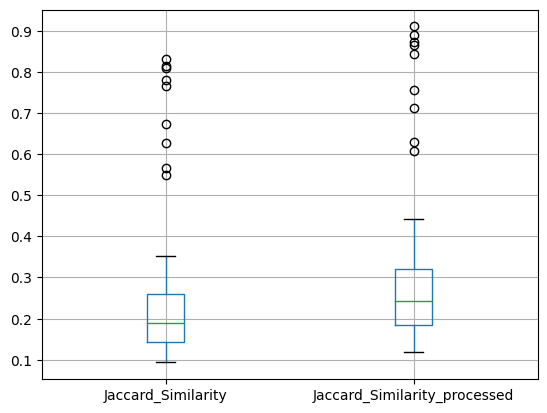

In [ ]:
movies.boxplot(column=sim_cols)

#TF-IDF

In [ ]:
# code adapted from: https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76

def computeIDF(documents, bow):

    idfDict = dict.fromkeys(bow, 0)
    for document in documents:
      for word in set(document):
        idfDict[word] += 1
    print(idfDict)
    for word, val in idfDict.items():
        idfDict[word] = len(documents) / float(val)
    return idfDict

In [ ]:
def computeTFIDFvector(document,idf, bow):
  count = np.zeros(len(idf))
  for word in document:
    count[bow.index(word)] += 1
  TF = count/len(document)
  TfIdf = TF*idf
  ntfidf = TfIdf/np.linalg.norm(TfIdf)
  return (ntfidf)



In [ ]:
idfs = computeIDF(listofdescriptions, bagofwords)
print(idfs)
idf = [idfs[key] for key in idfs.keys()]
print(idf)

{'aftermath,': 1, 'Arrivals': 1, 'Marine,': 1, 'Transylvania,': 1, 'hide.': 1, 'predecessor': 1, 'families': 8, 'booth': 9, 'once.As': 1, 'maskies,': 1, 'farm.While': 1, 'unrefined': 1, 'sewing': 1, 'group': 41, 'school.': 6, 'happenings': 1, 'physically': 3, 'tortured': 4, 'captivity.': 1, 'wages': 6, 'fight,': 20, 'Day': 6, 'cash': 13, 'product': 1, '[14]': 2, 'appear': 15, 'Bellows)': 1, 'guilty,': 2, 'Haya': 1, 'gladiators.': 1, 'clump': 1, 'womanizing': 3, 'salesman.': 1, 'beers,': 1, 'tremendous': 2, 'thumper': 1, 'account': 2, 'terrifying': 1, 'coma.At': 1, 'Oz.': 1, 'snakes.': 1, 'weaving': 1, '(aided': 1, '"\'Deserves\'': 1, 'me': 9, 'Montana': 1, 'Dotrice': 1, 'can': 110, '49,000-acre': 1, 'chases,': 1, 'recovering': 7, 'statements,': 1, 'rooms': 5, 'augments': 1, 'India,': 2, 'overturn': 1, 'separated': 6, 'Disillusioned,': 1, "Americans'": 1, 'Wade—and': 1, 'dispatched': 1, 'blue-collar': 1, 'Moon': 1, 'Fed': 2, 'European': 3, 'help.': 13, 'Sally,': 1, 'office/shack': 1, 'S

In [ ]:
movies["wiki_tfidf"] = movies.apply(lambda x: computeTFIDFvector(x.wiki_plot_words, idf, bagofwords), axis=1)

In [ ]:
movies["imdb_tfidf"] = movies.apply(lambda x: computeTFIDFvector(x.imdb_plot_words, idf, bagofwords), axis=1)



In [ ]:
movies["TfIdf_Similarity"] = movies.apply(lambda x: np.dot(x.wiki_tfidf, x.imdb_tfidf), axis=1)
sim_cols.append("TfIdf_Similarity")
movies

,rank,title,genre,wiki_plot,imdb_plot,wiki_plot_words,imdb_plot_words,Jaccard_Similarity,wiki_plot_lower,imdb_plot_lower,wiki_plot_lower_words,imdb_plot_lower_words,wiki_plot_processed,imdb_plot_processed,wiki_plot_processed_words,imdb_plot_processed_words,Jaccard_Similarity_processed,wiki_tfidf,imdb_tfidf,TfIdf_Similarity
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","[On, the, day, of, his, only, daughter's, wedd...","[In, late, summer, 1945,, guests, are, gathere...",0.164905,"on the day of his only daughter's wedding, vit...","in late summer 1945, guests are gathered for t...","[on, the, day, of, his, only, daughter's, wedd...","[in, late, summer, 1945,, guests, are, gathere...",on the day of his only daughters wedding vito ...,in late summer 1945 guests are gathered for th...,"[on, the, day, of, his, only, daughters, weddi...","[in, late, summer, 1945, guests, are, gathered...",0.207904,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01136024...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0047871706453...",0.248222
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","[In, 1947,, banker, Andy, Dufresne, is, convic...","[In, 1947,, Andy, Dufresne, (Tim, Robbins),, a...",0.158678,"in 1947, banker andy dufresne is convicted of ...","in 1947, andy dufresne (tim robbins), a banker...","[in, 1947,, banker, andy, dufresne, is, convic...","[in, 1947,, andy, dufresne, (tim, robbins),, a...",in 1947 banker andy dufresne is convicted of m...,in 1947 andy dufresne tim robbins a banker in ...,"[in, 1947, banker, andy, dufresne, is, convict...","[in, 1947, andy, dufresne, tim, robbins, a, ba...",0.204183,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.601029
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"[In, 1939,, the, Germans, move, Polish, Jews, ...","[The, relocation, of, Polish, Jews, from, surr...",0.236025,"in 1939, the germans move polish jews into the...",the relocation of polish jews from surrounding...,"[in, 1939,, the, germans, move, polish, jews, ...","[the, relocation, of, polish, jews, from, surr...",in 1939 the germans move polish jews into the ...,the relocation of polish jews from surrounding...,"[in, 1939, the, germans, move, polish, jews, i...","[the, relocation, of, polish, jews, from, surr...",0.292217,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078622827091...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.373550
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","[In, a, brief, scene, in, 1964,, an, aging,, o...","[The, film, opens, in, 1964,, where, an, older...",0.347518,"in a brief scene in 1964, an aging, overweight...","the film opens in 1964, where an older and fat...","[in, a, brief, scene, in, 1964,, an, aging,, o...","[the, film, opens, in, 1964,, where, an, older...",in a brief scene in 1964 an aging overweight i...,the film opens in 1964 where an older and fatt...,"[in, a, brief, scene, in, 1964, an, aging, ove...","[the, film, opens, in, 1964, where, an, older,...",0.441331,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.383462
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...","[It, is, early, December, 1941., American, exp...","[In, the, early, years, of, World, War, II,, D...",0.319708,it is early december 1941. american expatriate...,"in the early years of world war ii, december 1...","[it, is, early, december, 1941., american, exp...","[in, the, early, years, of, world, war

In [ ]:
# before Log Loss:  ['TfIdf_Similarity', 2.476729875788817]
log_loss.extend([[sim_cols[-1], logloss(movies,sim_cols[-1],True)]])
print("Log Loss: ", log_loss[-1])

Log Loss:  ['TfIdf_Similarity', 1.1233075163883877]


<Axes: >

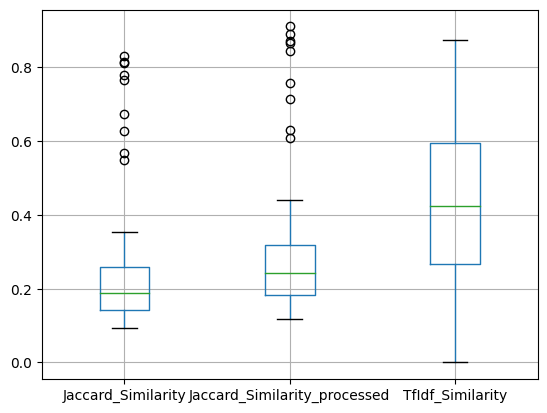

In [ ]:
movies.boxplot(column=sim_cols)

In [ ]:
ppidfs = computeIDF(listofppdescriptions, bagofppwords)
print(ppidfs)
ppidf = [ppidfs[key] for key in ppidfs.keys()]

{'kensington': 2, 'owens': 1, 'preacher': 2, 'burn': 13, 'dismissing': 4, 'predecessor': 1, 'families': 11, 'decides': 69, 'velcro': 1, 'hammersmith': 1, 'booth': 10, '20': 10, 'disobeys': 1, 'seine': 1, 'bodyguardson': 1, 'cultivate': 1, '1927s': 1, 'glitterstim': 1, 'dark': 26, 'downward': 2, 'applauding': 1, 'bride': 5, 'with': 180, 'avenge': 5, 'unrefined': 1, 'sewing': 1, 'group': 44, 'lefors': 2, 'distinguishes': 1, 'backstabbers': 1, 'happenings': 1, 'vengeance': 4, 'physically': 4, 'occupant': 1, 'prey': 3, 'tortured': 6, 'somethingmarge': 1, 'automatically': 2, 'lynns': 2, 'understands': 4, 'rail': 1, 'befriends': 11, 'wages': 6, 'tusken': 1, 'academic': 2, 'product': 1, 'cash': 14, 'kickbacks': 1, 'kinderman': 2, 'avail': 5, 'regis': 1, 'appear': 17, 'these': 15, 'maine': 2, 'praetorians': 1, 'ukraine': 1, 'beru': 2, 'clump': 1, 'girlfriendlater': 1, '1916may': 1, 'womanizing': 4, 'spray': 1, 'following': 53, 'freewill': 1, '88': 2, 'household': 5, 'juan': 3, 'believe': 44, '

In [ ]:
movies["wiki_processed_tfidf"] = movies.apply(lambda x: computeTFIDFvector(x.wiki_plot_processed_words, ppidf, bagofppwords), axis=1)

In [ ]:
movies["imdb_processed_tfidf"] = movies.apply(lambda x: computeTFIDFvector(x.imdb_plot_processed_words, ppidf, bagofppwords), axis=1)

In [ ]:
movies["TfIdf_Similarity_processed"] = movies.apply(lambda x: np.dot(x.wiki_processed_tfidf, x.imdb_processed_tfidf), axis=1)
sim_cols.append("TfIdf_Similarity_processed")

In [ ]:
log_loss.extend([[sim_cols[-1], logloss(movies,sim_cols[-1],True)]])
print("Log Loss: ", log_loss[-1])

Log Loss:  ['TfIdf_Similarity_processed', 0.8118780989279116]


<Axes: >

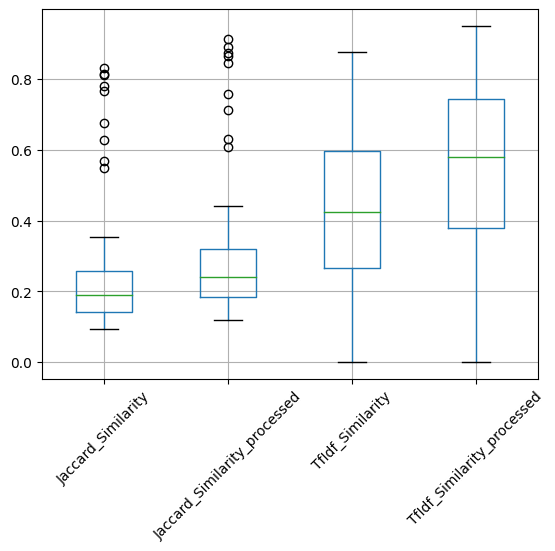

In [ ]:
movies.boxplot(column=sim_cols, rot=45)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine

In [ ]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(movies.wiki_plot.tolist()+movies.imdb_plot.tolist())
tfidf_matrix_wiki = tfidf_matrix[0:90]
tfidf_matrix_imdb = tfidf_matrix[90:180]
movies["wiki_tfidf_sklearn"] = tfidf_matrix_wiki.toarray().tolist()
movies["imdb_tfidf_sklearn"] = tfidf_matrix_imdb.toarray().tolist()

In [ ]:
movies

,rank,title,genre,wiki_plot,imdb_plot,wiki_plot_words,imdb_plot_words,Jaccard_Similarity,wiki_plot_lower,imdb_plot_lower,...,imdb_plot_processed_words,Jaccard_Similarity_processed,wiki_tfidf,imdb_tfidf,TfIdf_Similarity,wiki_processed_tfidf,imdb_processed_tfidf,TfIdf_Similarity_processed,wiki_tfidf_sklearn,imdb_tfidf_sklearn
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","[On, the, day, of, his, only, daughter's, wedd...","[In, late, summer, 1945,, guests, are, gathere...",0.164905,"on the day of his only daughter's wedding, vit...","in late summer 1945, guests are gathered for t...",...,"[in, late, summer, 1945, guests, are, gathered...",0.207904,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01136024...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0047871706453...",0.248222,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0382249130254...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0153101152352...",0.383528,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.006135991189786242, 0.0, 0.0, 0.0, 0.0..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","[In, 1947,, banker, Andy, Dufresne, is, convic...","[In, 1947,, Andy, Dufresne, (Tim, Robbins),, a...",0.158678,"in 1947, banker andy dufresne is convicted of ...","in 1947, andy dufresne (tim robbins), a banker...",...,"[in, 1947, andy, dufresne, tim, robbins, a, ba...",0.204183,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.601029,"[0.0, 0.0, 0.0, 0.006351977413587028, 0.0, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.669666,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.006095283500699287, 0.0, 0.0, 0.0, 0.0..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"[In, 1939,, the, Germans, move, Polish, Jews, ...","[The, relocation, of, Polish, Jews, from, surr...",0.236025,"in 1939, the germans move polish jews into the...",the relocation of polish jews from surrounding...,...,"[the, relocation, of, polish, jews, from, surr...",0.292217,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0078622827091...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.373550,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0059682476500...","[0.0, 0.0, 0.0, 0.0, 0.014004549219769975, 0.0...",0.473813,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.023729315758280637, 0.0, 0.0, 0.017781..."
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","[In, a, brief, scene, in, 1964,, an, aging,, o...","[The, film, opens, in, 1964,, where, an, older...",0.347518,"in a brief scene in 1964, an aging, overweight...","the film opens in 1964, where an older and fat...",...,"[the, film, opens, in, 1964, where, an, older,...",0.441331,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.383462,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00295048...",0.559958,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...","[It, is, early, December, 1941., American, exp...","[In, the, early, years, of, World, War, II,, D...",0.319708,it is early december 1941. american expatriate...,"in the early years of world war ii, december 1...",...,"[in, the, early, years, of, world, war, ii, de...",0.405018,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.630598,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",

In [ ]:
def cos(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [ ]:
movies["TfIdf_Similarity_sklearn"] = movies.apply(lambda x: cos(x.wiki_tfidf_sklearn, x.imdb_tfidf_sklearn), axis=1)
sim_cols.append("TfIdf_Similarity_sklearn")

In [ ]:
log_loss.extend([[sim_cols[-1], logloss(movies,sim_cols[-1],True)]])
print("Log Loss: ", log_loss[-1])

Log Loss:  ['TfIdf_Similarity_sklearn', 0.3195027918881958]


<Axes: >

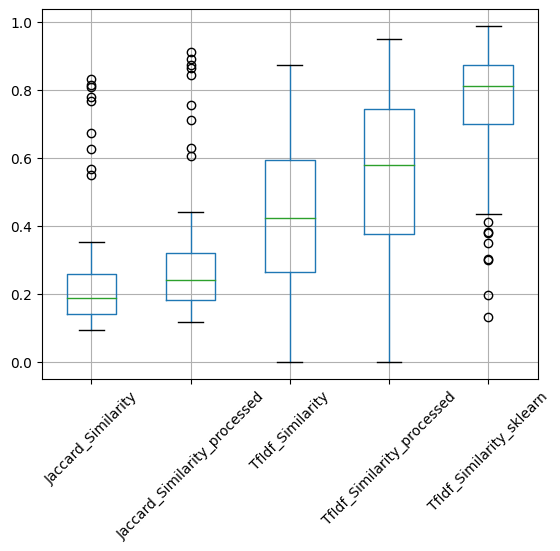

In [ ]:
movies.boxplot(column=sim_cols, rot=45)

In [ ]:
print(tfidf_matrix.shape)
print(tfidf_matrix.size)
print(tfidf_matrix.shape[0]*tfidf_matrix.shape[1])
tfidf_matrix

(180, 15693)
85291
2824740


<180x15693 sparse matrix of type '<class 'numpy.float64'>'
	with 85291 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_matrix.size/(tfidf_matrix.shape[0]*tfidf_matrix.shape[1])

0.030194283367672776

In [ ]:
#movies.loc[17]

In [ ]:
#print(movies["wiki_plot"].loc[17])
#print(movies["imdb_plot"].loc[17])

In [ ]:
#movies[["title","TfIdf_Similarity", "TfIdf_Similarity_processed", "TfIdf_Similarity_sklearn"]]

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming 'features' is your sparse matrix
# and it's already preprocessed appropriately

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=0, init="random")

# create the tsne arrangement of points in 2D (it is not really dimensionality reduction - it is arranging
# the points so that the most similar )
reduced_features = tsne.fit_transform(tfidf_matrix)

# Plot
#plt.figure(figsize=(10, 6))
#plt.scatter(reduced_features[:, 0], reduced_features[:, 1])
#plt.title('t-SNE Visualization of Data Items')
#plt.xlabel('t-SNE Feature 1')
#plt.ylabel('t-SNE Feature 2')
#plt.show()

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px
import plotly.io as pio

# Reduced features from t-SNE and labels are assumed to be defined already

# Create a DataFrame for Plotly
plot_df = pd.DataFrame(reduced_features, columns=['Feature 1', 'Feature 2'])
plot_df['Text'] = [f'{movie}_wiki' for movie in movies['title'].values]+[f'{movie}_imdb' for movie in movies['title'].values]

# Create a scatter plot
fig = px.scatter(plot_df, x='Feature 1', y='Feature 2', hover_data=['Text'])

# Update layout
fig.update_layout(title='t-SNE Visualization with Text on Hover',
                  xaxis_title='t-SNE Feature 1',
                  yaxis_title='t-SNE Feature 2')

# Save to HTML
file_name = 'interactive_tsne_plot.html'
pio.write_html(fig, file=file_name)

print(f"Plot saved as {file_name}")

# This saves the plot as an html file, which is foolproof on any machine (which is why I did it this way)

# But (I believe) you can also display plotly interactive plots within Jupyter. Can you work out how to do this?

pio.show(fig)

Plot saved as interactive_tsne_plot.html


#Word embeddings

In [ ]:
import spacy

In [ ]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 9.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Load the model with word embeddings
nlp = spacy.load('en_core_web_md')

In [ ]:
movies["Spacy_Similarity"] = movies.apply(lambda x: nlp(x.wiki_plot).similarity(nlp(x.imdb_plot)), axis=1)
sim_cols.append("Spacy_Similarity")
#movies

In [ ]:
log_loss.extend([[sim_cols[-1], logloss(movies,sim_cols[-1],True)]])
print("Log Loss: ", log_loss[-1])

Log Loss:  ['Spacy_Similarity', 0.014056164309183343]


<Axes: >

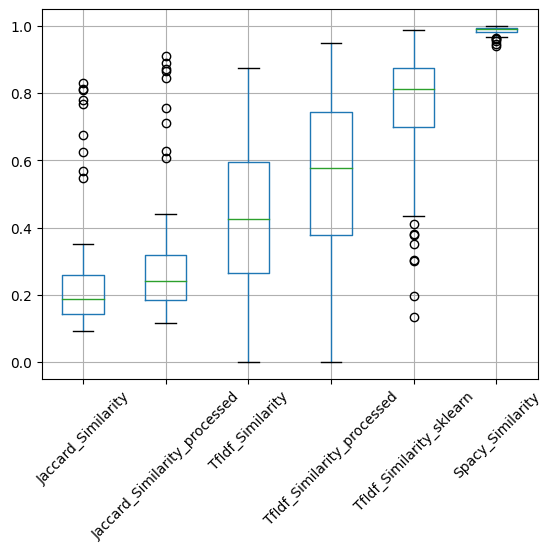

In [ ]:
movies.boxplot(column=sim_cols, rot=45)

In [ ]:
movies["Spacy_Similarity_processed"] = movies.apply(lambda x: nlp(x.wiki_plot_processed).similarity(nlp(x.imdb_plot_processed)), axis=1)
sim_cols.append("Spacy_Similarity_processed")

In [ ]:
log_loss.extend([[sim_cols[-1], logloss(movies,sim_cols[-1],True)]])
print("Log Loss: ", log_loss[-1])

Log Loss:  ['Spacy_Similarity_processed', 0.01067534637373024]


<Axes: >

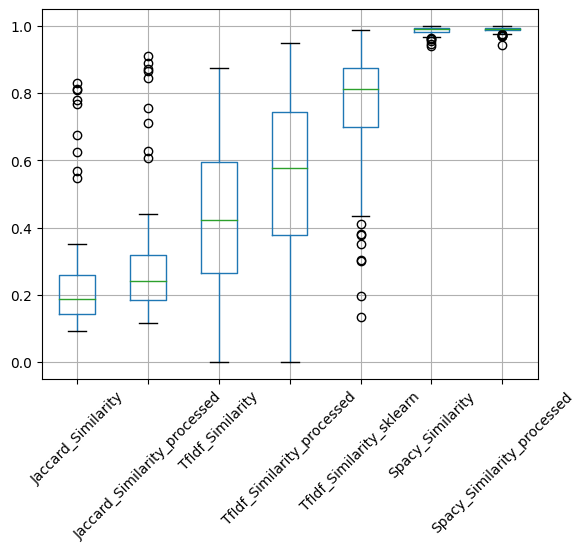

In [ ]:
movies.boxplot(column=sim_cols, rot=45)

                 Scoring Method  Log Loss
0            Jaccard_Similarity  1.561556
1  Jaccard_Similarity_processed  1.339073
2              TfIdf_Similarity  1.123308
3    TfIdf_Similarity_processed  0.811878
4      TfIdf_Similarity_sklearn  0.319503
5              Spacy_Similarity  0.014056
6    Spacy_Similarity_processed  0.010675


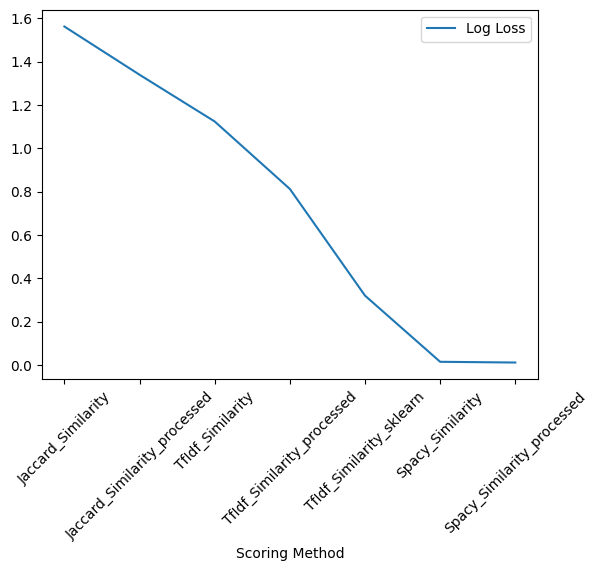

In [ ]:
lldf = pd.DataFrame(log_loss,columns=["Scoring Method","Log Loss"])
lldf.plot.line(x="Scoring Method",rot=45)
print(lldf)

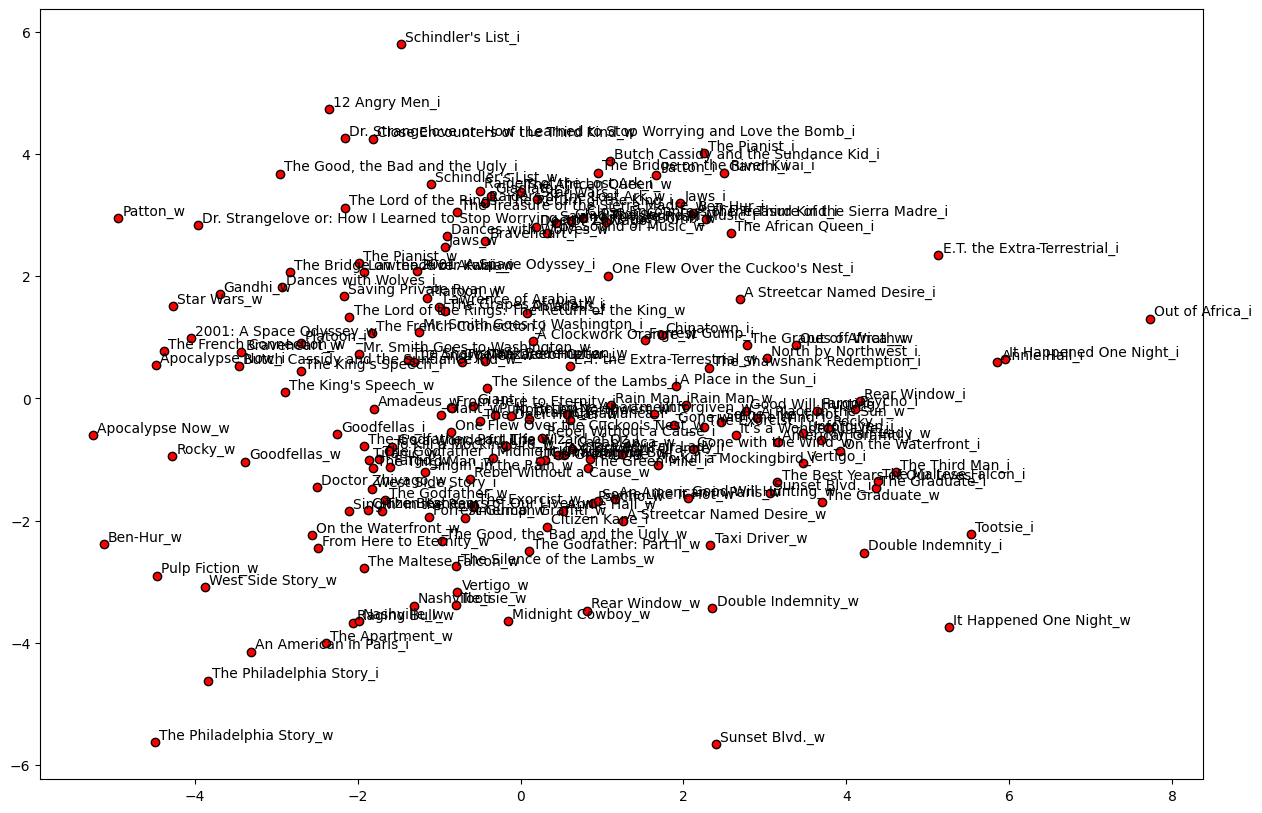

In [ ]:
from sklearn.decomposition import PCA  # We will use PCA to visualise the embeddings.

des_list = movies.wiki_plot.tolist()+movies.imdb_plot.tolist()
des_vectors = np.array([nlp(movie_des).vector for movie_des in des_list])

twodim = PCA().fit_transform(des_vectors)[:,:2]

plt.figure(figsize=(15,10))
plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
for movie, (x,y) in zip([f'{movie}_w' for movie in movies['title'].values]+[f'{movie}_i' for movie in movies['title'].values], twodim):
  plt.text(x+0.05, y+0.05, movie)

In [ ]:
print(f'similarity score between {movies["title"][13]} wiki and {movies["title"][2]} imdb')
nlp(movies["wiki_plot"][13]).similarity(nlp(movies["imdb_plot"][2]))

similarity score between Sunset Blvd. wiki and Schindler's List imdb


0.9065838495307004

In [ ]:
print(f'similarity score between {movies["title"][31]} wiki and {movies["title"][72]} imdb')
nlp(movies["wiki_plot"][31]).similarity(nlp(movies["imdb_plot"][72]))

similarity score between Apocalypse Now wiki and Out of Africa imdb


0.9145381228119381

In [ ]:
print(f'similarity score between {movies["title"][48]} wiki and {movies["title"][66]} wiki')
nlp(movies["wiki_plot"][48]).similarity(nlp(movies["imdb_plot"][66]))

similarity score between Patton wiki and It Happened One Night wiki


0.9059406371322446

# Sentence Embeddings

https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/

In [ ]:
!pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning:

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



In [ ]:
movies["wiki_sbert"] = movies.apply(lambda x: sbert_model.encode([x.wiki_plot])[0], axis=1)
movies["imdb_sbert"] = movies.apply(lambda x: sbert_model.encode([x.imdb_plot])[0], axis=1)
movies["wiki_sbert_processed"] = movies.apply(lambda x: sbert_model.encode([x.wiki_plot_processed])[0], axis=1)
movies["imdb_sbert_processed"] = movies.apply(lambda x: sbert_model.encode([x.imdb_plot_processed])[0], axis=1)


In [ ]:
movies["sbert_Similarity"] = movies.apply(lambda x: 1-cosine(x.wiki_sbert, x.imdb_sbert), axis=1)
sim_cols.append("sbert_Similarity")

In [ ]:
log_loss.extend([[sim_cols[-1], logloss(movies,sim_cols[-1],True)]])
print("Log Loss: ", log_loss[-1])

Log Loss:  ['sbert_Similarity', 0.17921242668335663]


In [ ]:
movies["sbert_Similarity_processed"] = movies.apply(lambda x: 1-cosine(x.wiki_sbert_processed, x.imdb_sbert_processed), axis=1)
sim_cols.append("sbert_Similarity_processed")

In [ ]:
log_loss.extend([[sim_cols[-1], logloss(movies,sim_cols[-1],True)]])
print("Log Loss: ", log_loss[-1])

Log Loss:  ['sbert_Similarity_processed', 0.16096852378156112]


<Axes: >

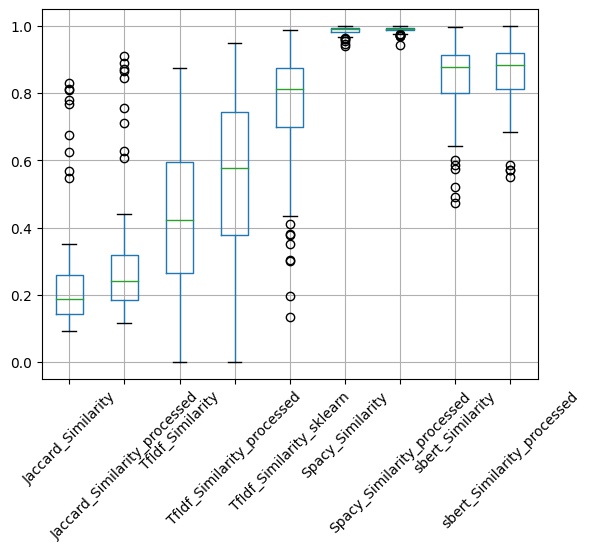

In [ ]:
movies.boxplot(column=sim_cols, rot=45)

                 Scoring Method  Log Loss
0            Jaccard_Similarity  1.561556
1  Jaccard_Similarity_processed  1.339073
2              TfIdf_Similarity  1.123308
3    TfIdf_Similarity_processed  0.811878
4      TfIdf_Similarity_sklearn  0.319503
5              Spacy_Similarity  0.014056
6    Spacy_Similarity_processed  0.010675
7              sbert_Similarity  0.179212
8    sbert_Similarity_processed  0.160969


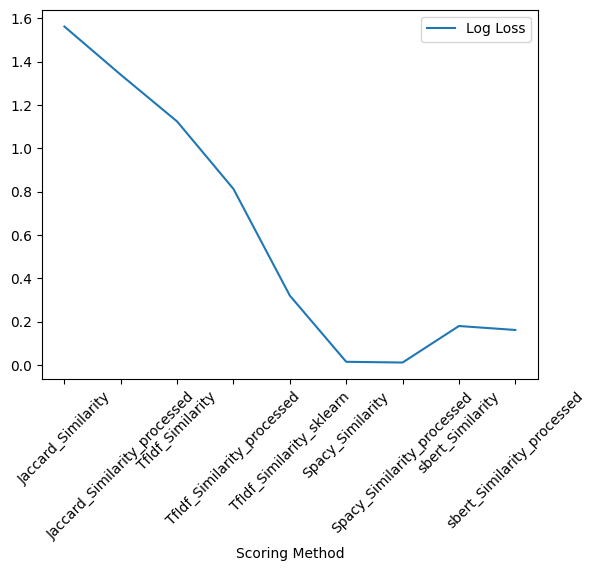

In [ ]:
lldf = pd.DataFrame(log_loss,columns=["Scoring Method","Log Loss"])
lldf.plot.line(x="Scoring Method",rot=45)
print(lldf)

#Negative Comparison

In [ ]:
#movies.columns

In [ ]:
import random
random.seed(47)

In [ ]:
movieIDs = movies["rank"].to_list()

cols = ["title", "imdb_plot", "imdb_plot_words", "imdb_tfidf",
        "imdb_plot_lower", "imdb_plot_lower_words",  "imdb_plot_processed",
        "imdb_plot_processed_words", "imdb_processed_tfidf",
        "imdb_tfidf_sklearn", "imdb_sbert", "imdb_sbert_processed"
        ]
imdbs = [pd.DataFrame(cols),pd.DataFrame(cols)]
for i in range(2):
  random.shuffle(movieIDs)
  imdbs[i] = movies[cols].loc[movieIDs].reset_index(drop=True)
  imdbs[i].columns = [f'{col}_{i+1}' for col in imdbs[i].columns]

In [ ]:
movie_pairs = pd.concat(imdbs, axis=1)
movie_pairs[["title_1","title_2"]]

,title_1,title_2
0,E.T. the Extra-Terrestrial,Raiders of the Lost Ark
1,Taxi Driver,Rocky
2,Nashville,Mr. Smith Goes to Washington
3,Lawrence of Arabia,A Streetcar Named Desire
4,Doctor Zhivago,The Exorcist
...,...,...
85,Goodfellas,The Green Mile
86,Good Will Hunting,It's a Wonderful Life
87,Platoon,Jaws
88,The Wizard of Oz,Out of Africa


No charts were generated by quickchart
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
movie_pairs["same?"] = movie_pairs["title_1"] == movie_pairs["title_2"]
sum(movie_pairs["same?"])

0

In [ ]:
movie_pairs.columns

Index(['title_1', 'imdb_plot_1', 'imdb_plot_words_1', 'imdb_tfidf_1',
       'imdb_plot_lower_1', 'imdb_plot_lower_words_1', 'imdb_plot_processed_1',
       'imdb_plot_processed_words_1', 'imdb_processed_tfidf_1',
       'imdb_tfidf_sklearn_1', 'imdb_sbert_1', 'imdb_sbert_processed_1',
       'title_2', 'imdb_plot_2', 'imdb_plot_words_2', 'imdb_tfidf_2',
       'imdb_plot_lower_2', 'imdb_plot_lower_words_2', 'imdb_plot_processed_2',
       'imdb_plot_processed_words_2', 'imdb_processed_tfidf_2',
       'imdb_tfidf_sklearn_2', 'imdb_sbert_2', 'imdb_sbert_processed_2',
       'same?'],
      dtype='object')

In [ ]:
movie_pairs["Jaccard_Similarity"] = movie_pairs.apply(lambda x: Jaccard(x.imdb_plot_words_1, x.imdb_plot_words_2), axis=1)
movie_pairs["Jaccard_Similarity_processed"] = movie_pairs.apply(lambda x: Jaccard(x.imdb_plot_processed_words_1, x.imdb_plot_processed_words_2), axis=1)
movie_pairs["TfIdf_Similarity"] =movie_pairs.apply(lambda x: np.dot(x.imdb_tfidf_1, x.imdb_tfidf_2), axis=1)
movie_pairs["TfIdf_Similarity_processed"] = movie_pairs.apply(lambda x: np.dot(x.imdb_processed_tfidf_1, x.imdb_processed_tfidf_2), axis=1)
movie_pairs["TfIdf_Similarity_sklearn"] = movie_pairs.apply(lambda x: 1- cosine(x.imdb_tfidf_sklearn_1, x.imdb_tfidf_sklearn_2), axis=1)
movie_pairs["Spacy_Similarity"] = movie_pairs.apply(lambda x: nlp(x.imdb_plot_1).similarity(nlp(x.imdb_plot_2)), axis=1)
movie_pairs["Spacy_Similarity_processed"] = movie_pairs.apply(lambda x: nlp(x.imdb_plot_processed_1).similarity(nlp(x.imdb_plot_processed_2)), axis=1)
movie_pairs["sbert_Similarity"] = movie_pairs.apply(lambda x: 1-cosine(x.imdb_sbert_1, x.imdb_sbert_2), axis=1)
movie_pairs["sbert_Similarity_processed"] = movie_pairs.apply(lambda x: 1-cosine(x.imdb_sbert_processed_1, x.imdb_sbert_processed_2), axis=1)


In [ ]:
ll = []
for col in sim_cols:
  print(col)
  ll.append(logloss(movie_pairs,col,False))
  print(ll[-1])
  print("")

Jaccard_Similarity
0.10099353902247302

Jaccard_Similarity_processed
0.12578245998444415

TfIdf_Similarity
0.0022293328216297452

TfIdf_Similarity_processed
0.002760844168081889

TfIdf_Similarity_sklearn
0.2405704842000654

Spacy_Similarity
3.658240721811301

Spacy_Similarity_processed
3.810759936625051

sbert_Similarity
1.0690239687212284

sbert_Similarity_processed
1.198992125288582



<Axes: >

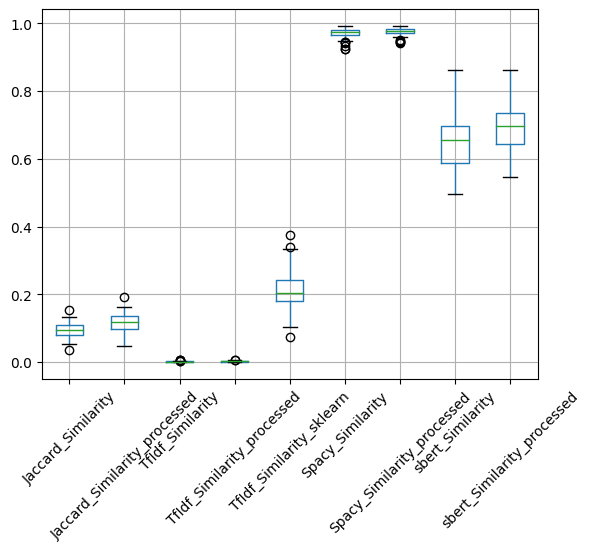

In [ ]:
movie_pairs.boxplot(column=sim_cols, rot=45)

In [ ]:
llS = pd.Series(ll)

In [ ]:
LL = pd.concat([lldf,llS],axis=1)
LL.columns = ["Scoring Method","Log Loss","Log Loss Diff"]
LL["Overall Log Loss"] = (LL["Log Loss Diff"]+LL["Log Loss"])/2
LL

,Scoring Method,Log Loss,Log Loss Diff,Overall Log Loss
0,Jaccard_Similarity,1.561556,0.100994,0.831275
1,Jaccard_Similarity_processed,1.339073,0.125782,0.732428
2,TfIdf_Similarity,1.123308,0.002229,0.562768
3,TfIdf_Similarity_processed,0.811878,0.002761,0.407319
4,TfIdf_Similarity_sklearn,0.319503,0.240570,0.280037
5,Spacy_Similarity,0.014056,3.658241,1.836148
6,Spacy_Similarity_processed,0.010675,3.810760,1.910718
7,sbert_Similarity,0.179212,1.069024,0.624118
8,sbert_Similarity_processed,0.160969,1.198992,0.679980


<Axes: xlabel='Scoring Method'>

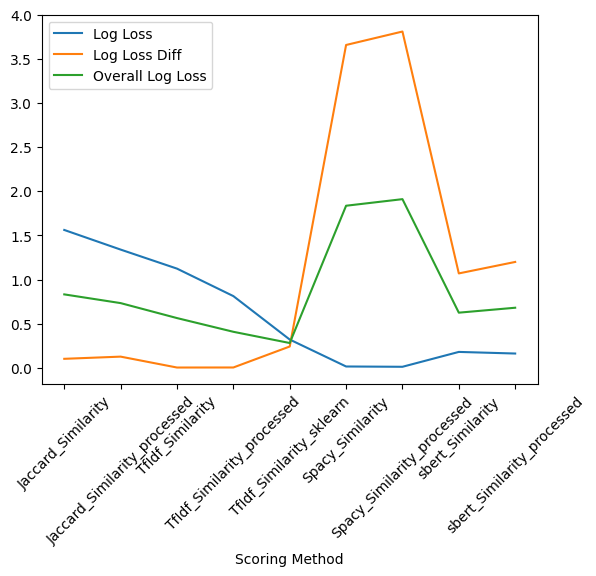

In [ ]:
LL.plot.line(x="Scoring Method",rot=45)

next bit

In [ ]:
imdb_plot_lengths = [len(description) for description in movies["imdb_plot_words"].values]
np.mean(imdb_plot_lengths)

1616.1333333333334

In [ ]:
wiki_plot_lengths = [len(description) for description in movies["wiki_plot_words"].values]
np.mean(wiki_plot_lengths)

1660.8111111111111

In [ ]:
imdb_plot_char_lengths = [len(description) for description in movies["imdb_plot"].values]
np.mean(imdb_plot_char_lengths)

9312.177777777777

In [ ]:
wiki_plot_char_lengths = [len(description) for description in movies["wiki_plot"].values]
np.mean(wiki_plot_char_lengths)

9888.966666666667

In [ ]:
movies["wiki_plot_sent1"] = movies.wiki_plot.map(lambda x: x[:len(x)//2])

In [ ]:
movies["wiki_plot_sent1"] = movies.wiki_plot.map(lambda x: x[:len(x)//10])
movies["wiki_plot_sent1_words"] = movies.wiki_plot_sent1.str.split()
movies["imdb_plot_sent1"] = movies.imdb_plot.map(lambda x: x[:len(x)//10])
movies["imdb_plot_sent1_words"] = movies.imdb_plot_sent1.str.split()

In [ ]:
movies["wiki_plot_sent1_lower"] = movies.wiki_plot_sent1.str.lower()
movies["imdb_plot_sent1_lower"] = movies.imdb_plot_sent1.str.lower()
movies["wiki_plot_sent1_processed"] = movies["wiki_plot_sent1_lower"].str.replace(r'[^\w\d\s]+', '', regex=True)
movies["imdb_plot_sent1_processed"] = movies["imdb_plot_sent1_lower"].str.replace(r'[^\w\d\s]+', '', regex=True)
movies["wiki_plot_sent1_processed_words"] = movies.wiki_plot_sent1_processed.str.split()
movies["imdb_plot_sent1_processed_words"] = movies.imdb_plot_sent1_processed.str.split()

In [ ]:
listofsent1descriptions = movies.wiki_plot_sent1_words.tolist()+movies.imdb_plot_sent1_words.tolist()
print(len(listofsent1descriptions))
bagofsent1words = create_bow(listofsent1descriptions)
len(bagofsent1words)

180


7838

In [ ]:
listofsent1ppdescriptions = movies.wiki_plot_sent1_processed_words.tolist()+movies.imdb_plot_sent1_processed_words.tolist()
print(len(listofsent1ppdescriptions))
bagofsent1ppwords = create_bow(listofsent1ppdescriptions)
len(bagofsent1ppwords)

180


5995

In [ ]:
vec_sent1 = TfidfVectorizer()
tfidf_matrix = vec_sent1.fit_transform(movies.wiki_plot_sent1.tolist()+movies.imdb_plot_sent1.tolist())
tfidf_matrix_wiki = tfidf_matrix[0:90]
tfidf_matrix_imdb = tfidf_matrix[90:180]
movies["wiki_tfidf_sent1_sklearn"] = tfidf_matrix_wiki.toarray().tolist()
movies["imdb_tfidf_sent1_sklearn"] = tfidf_matrix_imdb.toarray().tolist()

In [ ]:
movies["Jaccard_Similarity_sent1"] = movies.apply(lambda x: Jaccard(x.wiki_plot_sent1_words, x.imdb_plot_sent1_words), axis=1)
movies["Jaccard_Similarity_sent1_processed"] = movies.apply(lambda x: Jaccard(x.imdb_plot_sent1_processed_words, x.imdb_plot_sent1_processed_words), axis=1)
#movie_pairs["TfIdf_Similarity_sent1"] =movie_pairs.apply(lambda x: np.dot(x.imdb_tfidf_1, x.imdb_tfidf_2), axis=1)
#movie_pairs["TfIdf_Similarity_sent1_processed"] = movie_pairs.apply(lambda x: 1-cosine(x.imdb_processed_tfidf_1, x.imdb_processed_tfidf_2), axis=1)
movies["TfIdf_Similarity_sent1_sklearn"] = movies.apply(lambda x: 1- cosine(x.imdb_tfidf_sent1_sklearn, x.imdb_tfidf_sent1_sklearn), axis=1)
movies["Spacy_Similarity_sent1"] = movies.apply(lambda x: nlp(x.imdb_plot_sent1).similarity(nlp(x.imdb_plot_sent1)), axis=1)

In [ ]:
movies

,rank,title,genre,wiki_plot,imdb_plot,wiki_plot_words,imdb_plot_words,Jaccard_Similarity,wiki_plot_lower,imdb_plot_lower,...,wiki_plot_sent1_processed,imdb_plot_sent1_processed,wiki_plot_sent1_processed_words,imdb_plot_sent1_processed_words,wiki_tfidf_sent1_sklearn,imdb_tfidf_sent1_sklearn,Jaccard_Similarity_sent1,Jaccard_Similarity_sent1_processed,TfIdf_Similarity_sent1_sklearn,Spacy_Similarity_sent1
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","[On, the, day, of, his, only, daughter's, wedd...","[In, late, summer, 1945,, guests, are, gathere...",0.164905,"on the day of his only daughter's wedding, vit...","in late summer 1945, guests are gathered for t...",...,on the day of his only daughters wedding vito ...,in late summer 1945 guests are gathered for th...,"[on, the, day, of, his, only, daughters, weddi...","[in, late, summer, 1945, guests, are, gathered...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.106996,1.0,1.0,1.0
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","[In, 1947,, banker, Andy, Dufresne, is, convic...","[In, 1947,, Andy, Dufresne, (Tim, Robbins),, a...",0.158678,"in 1947, banker andy dufresne is convicted of ...","in 1947, andy dufresne (tim robbins), a banker...",...,in 1947 banker andy dufresne is convicted of m...,in 1947 andy dufresne tim robbins a banker in ...,"[in, 1947, banker, andy, dufresne, is, convict...","[in, 1947, andy, dufresne, tim, robbins, a, ba...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.162304,1.0,1.0,1.0
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"[In, 1939,, the, Germans, move, Polish, Jews, ...","[The, relocation, of, Polish, Jews, from, surr...",0.236025,"in 1939, the germans move polish jews into the...",the relocation of polish jews from surrounding...,...,in 1939 the germans move polish jews into the ...,the relocation of polish jews from surrounding...,"[in, 1939, the, germans, move, polish, jews, i...","[the, relocation, of, polish, jews, from, surr...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.161677,1.0,1.0,1.0
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","[In, a, brief, scene, in, 1964,, an, aging,, o...","[The, film, opens, in, 1964,, where, an, older...",0.347518,"in a brief scene in 1964, an aging, overweight...","the film opens in 1964, where an older and fat...",...,in a brief scene in 1964 an aging overweight i...,the film opens in 1964 where an older and fatt...,"[in, a, brief, scene, in, 1964, an, aging, ove...","[the, film, opens, in, 1964, where, an, older,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06426240...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.179641,1.0,1.0,1.0
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...","[It, is, early, December, 1941., American, exp...","[In, the, early, years, of, World, War, II,, D...",0.319708,it is early december 1941. american expatriate...,"in the early years of world war ii, december 1...",...,it is early december 1941 american expatriate ...,in the early years of world war ii december 19...,"[it, is, early, december, 1941, american, expa...","[in, the, early, years, of, world, war, ii, de...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.130769,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

<Axes: >

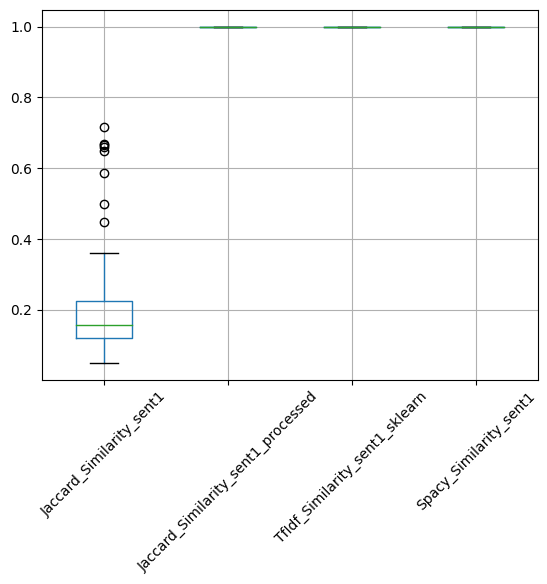

In [ ]:
movies.boxplot(column=["Jaccard_Similarity_sent1","Jaccard_Similarity_sent1_processed","TfIdf_Similarity_sent1_sklearn","Spacy_Similarity_sent1"], rot=45)